# Importing the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('car_prices.csv')

# Learning the dataset

In [3]:
df.head(3)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


In [5]:
#df['year'].value_counts()
df['make'].value_counts()

make
Ford          93554
Chevrolet     60197
Nissan        53946
Toyota        39871
Dodge         30710
              ...  
airstream         1
ford tk           1
chev truck        1
hyundai tk        1
Lotus             1
Name: count, Length: 96, dtype: int64

In [6]:
df['body'].value_counts()

body
Sedan          199437
SUV            119292
sedan           41906
suv             24552
Hatchback       21380
                ...  
cab plus 4          1
g37 coupe           1
CTS-V Wagon         1
Ram Van             1
cts wagon           1
Name: count, Length: 87, dtype: int64

In [7]:
df['state'].value_counts()    #notice that there are some odd values in this column

state
fl                   82945
ca                   73148
pa                   53907
tx                   45913
ga                   34750
                     ...  
3vwd17aj2fm285365        1
3vwd17aj3fm276741        1
3vwd17aj2fm258506        1
3vwd17aj4fm201708        1
3vwd17aj2fm261566        1
Name: count, Length: 64, dtype: int64

In [8]:
df['transmission'].value_counts()

transmission
automatic    475915
manual        17544
sedan            15
Sedan            11
Name: count, dtype: int64

In [9]:
df['sellingprice'].value_counts()

sellingprice
11000.0     4453
12000.0     4450
13000.0     4334
10000.0     4029
14000.0     3899
            ... 
28350.0        1
30201.0        1
131500.0       1
31550.0        1
27840.0        1
Name: count, Length: 1887, dtype: int64

In [10]:
df['mmr'].value_counts()

mmr
12500.0     1761
11600.0     1751
11650.0     1746
12150.0     1722
11850.0     1717
            ... 
172000.0       1
134000.0       1
113000.0       1
154000.0       1
164000.0       1
Name: count, Length: 1101, dtype: int64

#### Here we can see that there are values in the "transmission" column which do not make sense; a sedan is a the body of the vehicle and can be either manual or automatic. Considering that the dataset is so large we can afford to drop those rows with an incorrect value for the "transmission" column. There are still rows with empty cells so part of the preprocessing would be remove rows with null values.

#### Here we see that some values in the "state" column are out of place, we can remove those rows. 

#### Some columns can be dropped because we do not need to work with them in this solution.

# Data Preprocessing 

#### Firstly, we remove all the column which we are not using in the dataset. These include: make, model, body, trim , vin, condition, odometer, color , interior and saledate .

In [11]:
#code
df.drop('make', axis=1, inplace=True)
df.drop('model', axis=1, inplace=True)
df.drop('body', axis=1, inplace=True)
df.drop('trim', axis=1,inplace=True)
df.drop('vin', axis=1,inplace=True)
df.drop('condition', axis=1,inplace=True)
df.drop('odometer', axis=1,inplace=True)
df.drop('color', axis=1,inplace=True)
df.drop('interior', axis=1,inplace=True)
df.drop('saledate', axis=1,inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   transmission  493485 non-null  object 
 2   state         558837 non-null  object 
 3   seller        558837 non-null  object 
 4   mmr           558799 non-null  float64
 5   sellingprice  558825 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 25.6+ MB


#### Secondly , we clean the 'Transmission' column by removing the values 'sedan' and 'Sedan', then we will remove all the rows with null values in the column.

In [13]:
#code
df.drop(df.loc[df['transmission']=="sedan"].index, inplace=True)
df.drop(df.loc[df['transmission']=="Sedan"].index, inplace=True)

#### Thirdly, we clean the dataset by removing all the null values.

In [14]:
#code
df.dropna()

,year,transmission,state,seller,mmr,sellingprice
0,2015,automatic,ca,kia motors america inc,20500.0,21500.0
1,2015,automatic,ca,kia motors america inc,20800.0,21500.0
2,2014,automatic,ca,financial services remarketing (lease),31900.0,30000.0
3,2015,automatic,ca,volvo na rep/world omni,27500.0,27750.0
4,2014,automatic,ca,financial services remarketing (lease),66000.0,67000.0
...,...,...,...,...,...,...
558831,2011,automatic,fl,lauderdale imports ltd bmw pembrok pines,20300.0,22800.0
558833,2012,automatic,wa,i -5 uhlmann rv,30200.0,30800.0
558834,2012,automatic,ca,financial services remarketing (lease),29800.0,34000.0
558835,2015,automatic,ga,enterprise vehicle exchange / tra / rental / t...,15100.0,11100.0


#### When we dropped the rows with null values,  the 'state' column was cleaned by removing the rows which have nonsensical values. Futher cleaning includes droping rows which belong to Canada since this project focuses on US states.

In [15]:
df['state'].unique()
#df['state'].describe()

array(['ca', 'tx', 'pa', 'mn', 'az', 'wi', 'tn', 'md', 'fl', 'ne', 'nj',
       'nv', 'oh', 'mi', 'ga', 'va', 'sc', 'nc', 'in', 'il', 'co', 'ut',
       'mo', 'ny', 'ma', 'pr', 'or', 'la', 'wa', 'hi', 'qc', 'ab', 'on',
       'ok', 'ms', 'nm', 'al', 'ns'], dtype=object)

usa: ALABAMA -AL
ALASKA 	-AK
ARIZONA -AZ
CALIFORNIA -CA
COLORADO -CO
FLORIDA -FL
GEORGIA -GA
HAWAII- HI
ILLINOIS -IL
INDIANA -IN
LOUISIANA -LA
MARYLAND -MD
MASSACHUSETTS -MA
MICHIGAN -MI
MINNESOTA -MN
MISSISSIPPI -MS
MISSOURI -MO
NEVADA -NV
NEW JERSEY -NJ
NEW MEXICO -NM
NEW YORK -NY
NORTH CAROLINA -NC
OHIO -OH
OKLAHOMA -OK
OREGON -OR
PENNSYLVANIA -PA
PUERTO RICO-PR 
SOUTH CAROLINA -SC
TENNESSEE -TN
TEXAS -TX
UTAH- UT
VIRGINIA -VA
WASHINGTON -WA
WISCONSIN -WI

canada: QUEBEC-QC, ALBERTA-AB, ONTARIO-ON

In [16]:
df.drop(df.loc[df['state']=="qc"].index, inplace=True)
df.drop(df.loc[df['state']=="ab"].index, inplace=True)
df.drop(df.loc[df['state']=="on"].index, inplace=True)

In [17]:
#df['state'].unique()
df['state'].describe()

count     553196
unique        35
top           fl
freq       82945
Name: state, dtype: object

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 553196 entries, 0 to 558836
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          553196 non-null  int64  
 1   transmission  493459 non-null  object 
 2   state         553196 non-null  object 
 3   seller        553196 non-null  object 
 4   mmr           553184 non-null  float64
 5   sellingprice  553184 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 29.5+ MB


# Working With the Data: Separating by State

#### We used a dictionary to store the dataframes for each state; the state is the key. The states are stored in an array which we iterate over to filter the rows with the common states and store in a dataframe. A dictionary was used because it is a collection which is ordered and changeable with no duplicate members. The most important ascpect to us is the "no duplicates", if there were duplicates then we would have incorrect statistics. Sets also allows for the "no duplicate" feature however we thought that having that 'key' aspect from using a dictionary more useful for this solution.

In [19]:
state_dfs = {}
states = ['ca', 'tx', 'pa', 'mn', 'az', 'wi', 'tn', 'md', 'fl', 'ne', 'nj','nv', 'oh', 'mi', 'ga', 'va', 'sc', 'nc', 
          'in', 'il', 'co', 'ut','mo', 'ny', 'ma', 'pr', 'or', 'la', 'wa', 'hi', 'ok', 'ms', 'nm', 'al', 'ns']

for state in states:
    state_df = df.loc[df['state'] == state]
    state_dfs[state] = state_df

# Grouping by dealerships, finding mean, determining best seller for each state, storing in dataframe

#### Created a dataframe 'results' to hold the dealership with the lowest prices in each state. Stored each state in their own dataframe for easier manipulation on our path; then for each state we used groupby() to get a total selling price for each unique seller in the dataframe. From this we determined the mean for each seller and used the minimum mean value to justify the seller as a the one with the lowest prices. 

In [20]:
results = pd.DataFrame(columns=['state','dealership','lowest_price_mean'])

for state in states:
    df2 = state_dfs[state]
    total_sellingprice = df2['sellingprice'].groupby(df2['seller']) 
    df2 = total_sellingprice.mean()
    lowest_deal = df2.min() 
    dealer = df2.idxmin()
    results.loc[len(results.index)] = [state, dealer, lowest_deal]
    #print(state, dealer, lowest_deal)

In [21]:
results.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35 entries, 0 to 34
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   state              35 non-null     object 
 1   dealership         35 non-null     object 
 2   lowest_price_mean  35 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.1+ KB


# This shows the dealership with the best prices in each state.

In [22]:
results

,state,dealership,lowest_price_mean
0,ca,american red cross/lehigh valley,200.0
1,tx,showcase automotives,250.0
2,pa,axcess financial,300.0
3,mn,purple heart services inc,587.5
4,az,best choice auto,300.0
5,wi,cag acceptance,250.0
6,tn,noor auto sales inc.,350.0
7,md,fleet lease disposal,200.0
8,fl,accountable finance inc,300.0
9,ne,bell auto sales,200.0


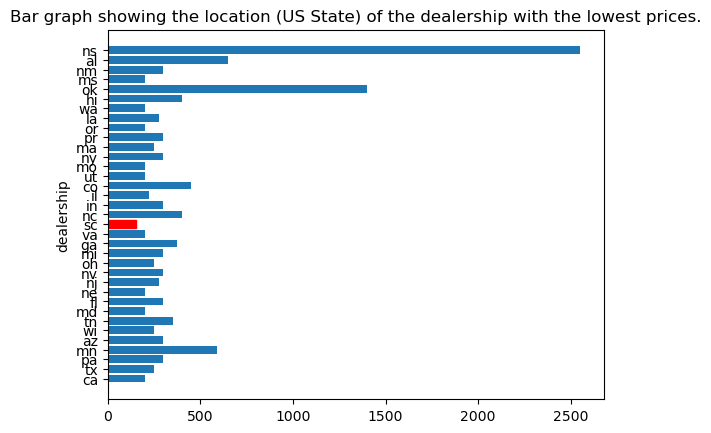

In [23]:
plt.barh(results.state,results.lowest_price_mean)
plt.ylabel('dealership')
plt.title('Bar graph showing the location (US State) of the dealership with the lowest prices.')
bar_to_color = 16 
plt.gca().get_children()[bar_to_color].set_color('red')
plt.show()